In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

In [3]:
df = pd.read_csv(DATOS_DIR + 'Iris.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
T = np.array(df.iloc[:,-1])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
T = binarizer.fit_transform(T)

print('Clases :', binarizer.classes_)


Clases : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
        X, T, test_size=0.30) #, random_state=42)

#Y_trainB = to_categorical(Y_train)

In [5]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [6]:

# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Input(shape=[4]))
model.add(Dense(2, activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Entrena el modelo y guarda la historia del progreso
history = model.fit(x=X_train, y=T_train, batch_size=20, validation_split=0.25, epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 93ms/step - loss: 0.6920 - accuracy: 0.2949 - val_loss: 0.6752 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6881 - accuracy: 0.2949 - val_loss: 0.6721 - val_accuracy: 0.3333
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.2949 - val_loss: 0.6692 - val_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6806 - accuracy: 0.2949 - val_loss: 0.6666 - val_accuracy: 0.3333
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6772 - accuracy: 0.2949 - val_loss: 0.6641 - val_accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6742 - accuracy: 0.2949 - val_loss: 0.6619 - val_accuracy: 0.3333
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.2949 - val_loss: 0.6597 - val_accuracy: 0.3333
Epoch 8/500
4/4 [====

4/4 [==============================] - 0s 11ms/step - loss: 0.6233 - accuracy: 0.3846 - val_loss: 0.6319 - val_accuracy: 0.2222
Epoch 60/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6229 - accuracy: 0.3846 - val_loss: 0.6318 - val_accuracy: 0.2222
Epoch 61/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6226 - accuracy: 0.3846 - val_loss: 0.6315 - val_accuracy: 0.2222
Epoch 62/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6222 - accuracy: 0.3846 - val_loss: 0.6312 - val_accuracy: 0.2222
Epoch 63/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6220 - accuracy: 0.3846 - val_loss: 0.6309 - val_accuracy: 0.2222
Epoch 64/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.3846 - val_loss: 0.6307 - val_accuracy: 0.2222
Epoch 65/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.3846 - val_loss: 0.6305 - val_accuracy: 0.2222
Epoch 66/500
4/4 [============

4/4 [==============================] - 0s 11ms/step - loss: 0.5903 - accuracy: 0.3974 - val_loss: 0.5995 - val_accuracy: 0.2222
Epoch 118/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5895 - accuracy: 0.3974 - val_loss: 0.5984 - val_accuracy: 0.2222
Epoch 119/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5883 - accuracy: 0.3974 - val_loss: 0.5973 - val_accuracy: 0.2222
Epoch 120/500
4/4 [==============================] - 0s 8ms/step - loss: 0.5875 - accuracy: 0.3974 - val_loss: 0.5962 - val_accuracy: 0.2222
Epoch 121/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5865 - accuracy: 0.3974 - val_loss: 0.5950 - val_accuracy: 0.2222
Epoch 122/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5854 - accuracy: 0.4103 - val_loss: 0.5939 - val_accuracy: 0.2222
Epoch 123/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5844 - accuracy: 0.4231 - val_loss: 0.5928 - val_accuracy: 0.2222
Epoch 124/500
4/4 [======

4/4 [==============================] - 0s 9ms/step - loss: 0.5193 - accuracy: 0.9231 - val_loss: 0.5198 - val_accuracy: 0.8148
Epoch 176/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5181 - accuracy: 0.9487 - val_loss: 0.5184 - val_accuracy: 0.8519
Epoch 177/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5168 - accuracy: 0.9615 - val_loss: 0.5169 - val_accuracy: 0.8519
Epoch 178/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5155 - accuracy: 0.9615 - val_loss: 0.5155 - val_accuracy: 0.8519
Epoch 179/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5142 - accuracy: 0.9615 - val_loss: 0.5140 - val_accuracy: 0.8519
Epoch 180/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5129 - accuracy: 0.9487 - val_loss: 0.5125 - val_accuracy: 0.8889
Epoch 181/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.9615 - val_loss: 0.5110 - val_accuracy: 0.8889
Epoch 182/500
4/4 [======

4/4 [==============================] - 0s 11ms/step - loss: 0.4535 - accuracy: 0.8590 - val_loss: 0.4462 - val_accuracy: 0.9259
Epoch 234/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4527 - accuracy: 0.8590 - val_loss: 0.4451 - val_accuracy: 0.9259
Epoch 235/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4516 - accuracy: 0.8590 - val_loss: 0.4441 - val_accuracy: 0.9259
Epoch 236/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4506 - accuracy: 0.8590 - val_loss: 0.4431 - val_accuracy: 0.9259
Epoch 237/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.8590 - val_loss: 0.4421 - val_accuracy: 0.9259
Epoch 238/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4488 - accuracy: 0.8590 - val_loss: 0.4411 - val_accuracy: 0.9259
Epoch 239/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4480 - accuracy: 0.8462 - val_loss: 0.4402 - val_accuracy: 0.9259
Epoch 240/500
4/4 [==

Epoch 291/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4115 - accuracy: 0.8590 - val_loss: 0.4011 - val_accuracy: 0.9259
Epoch 292/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4110 - accuracy: 0.8590 - val_loss: 0.4006 - val_accuracy: 0.9259
Epoch 293/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4105 - accuracy: 0.8590 - val_loss: 0.4000 - val_accuracy: 0.9259
Epoch 294/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4099 - accuracy: 0.8590 - val_loss: 0.3994 - val_accuracy: 0.9259
Epoch 295/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4094 - accuracy: 0.8590 - val_loss: 0.3988 - val_accuracy: 0.9259
Epoch 296/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4090 - accuracy: 0.8590 - val_loss: 0.3982 - val_accuracy: 0.9259
Epoch 297/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4084 - accuracy: 0.8590 - val_loss: 0.3977 - val_accuracy: 0.9259
Epoch 298

Epoch 349/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3866 - accuracy: 0.8590 - val_loss: 0.3751 - val_accuracy: 0.9259
Epoch 350/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3863 - accuracy: 0.8590 - val_loss: 0.3748 - val_accuracy: 0.9259
Epoch 351/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3860 - accuracy: 0.8718 - val_loss: 0.3744 - val_accuracy: 0.9259
Epoch 352/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3856 - accuracy: 0.8718 - val_loss: 0.3741 - val_accuracy: 0.9259
Epoch 353/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.8718 - val_loss: 0.3738 - val_accuracy: 0.9259
Epoch 354/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3850 - accuracy: 0.8718 - val_loss: 0.3735 - val_accuracy: 0.9259
Epoch 355/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3847 - accuracy: 0.8718 - val_loss: 0.3731 - val_accuracy: 0.9259
Epoch 356/5

Epoch 407/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3708 - accuracy: 0.9103 - val_loss: 0.3591 - val_accuracy: 0.9259
Epoch 408/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.9103 - val_loss: 0.3589 - val_accuracy: 0.9630
Epoch 409/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3704 - accuracy: 0.9103 - val_loss: 0.3587 - val_accuracy: 0.9630
Epoch 410/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3702 - accuracy: 0.8974 - val_loss: 0.3585 - val_accuracy: 0.9630
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3700 - accuracy: 0.8974 - val_loss: 0.3583 - val_accuracy: 0.9630
Epoch 412/500
4/4 [==============================] - 0s 14ms/step - loss: 0.3698 - accuracy: 0.8974 - val_loss: 0.3581 - val_accuracy: 0.9630
Epoch 413/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3699 - accuracy: 0.8846 - val_loss: 0.3579 - val_accuracy: 0.9630
Epoch 414

Epoch 465/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3601 - accuracy: 0.9103 - val_loss: 0.3484 - val_accuracy: 0.9630
Epoch 466/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3599 - accuracy: 0.9231 - val_loss: 0.3482 - val_accuracy: 0.9630
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3599 - accuracy: 0.9231 - val_loss: 0.3481 - val_accuracy: 0.9630
Epoch 468/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3596 - accuracy: 0.9231 - val_loss: 0.3479 - val_accuracy: 0.9630
Epoch 469/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3594 - accuracy: 0.9231 - val_loss: 0.3478 - val_accuracy: 0.9630
Epoch 470/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3595 - accuracy: 0.9231 - val_loss: 0.3476 - val_accuracy: 0.9630
Epoch 471/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3592 - accuracy: 0.9231 - val_loss: 0.3475 - val_accuracy: 0.9630
Epoch 

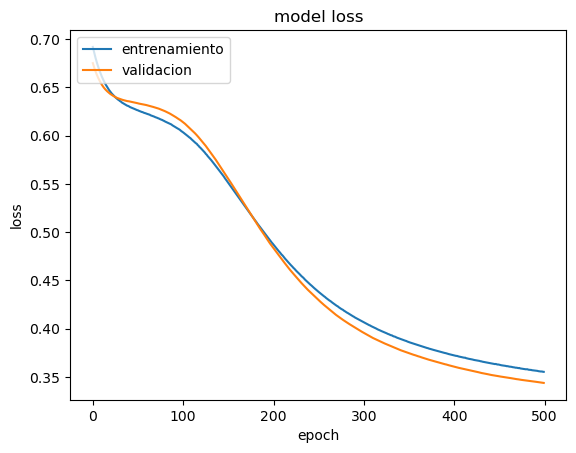

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()

In [10]:
# Evaluación del modelo
score = model.evaluate(X_train, T_train) 

print('Error :', score[0]) 
print('Accuracy:', score[1])


4/4 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.9333
Error : 0.3520842492580414
Accuracy: 0.9333333373069763


In [11]:
# predecir la salida del modelo
Y = model.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
T_str = binarizer.inverse_transform(T_train)
Y_str = binarizer.inverse_transform(Y)

print("%% aciertos : %.3f" % metrics.accuracy_score(T_str, Y_str))
print(Y[:5,:])
print(Y_str[:5])

4/4 [==============================] - 0s 2ms/step
% aciertos : 0.933
[[0.02117161 0.49010068 0.48872766]
 [0.11893166 0.5385105  0.34255785]
 [0.00959274 0.4494983  0.5409089 ]
 [0.96916395 0.02669369 0.00414219]
 [0.01366959 0.46839577 0.5179346 ]]
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']


In [12]:
report = metrics.classification_report(T_str, Y_str, target_names=binarizer.classes_)
print("Training metrics:\n%s" % report) 

MM = metrics.confusion_matrix(T_str, Y_str)
print("Confusion matrix:\n%s" % MM)

Training metrics:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.97      0.83      0.90        36
 Iris-virginica       0.86      0.97      0.91        37

       accuracy                           0.93       105
      macro avg       0.94      0.94      0.94       105
   weighted avg       0.94      0.93      0.93       105

Confusion matrix:
[[32  0  0]
 [ 0 30  6]
 [ 0  1 36]]


In [13]:
# predecir la salida del modelo
Y_test = model.predict(X_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
T_test_str = binarizer.inverse_transform(T_test)
Y_test_str = binarizer.inverse_transform(Y_test)

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(T_test_str, Y_test_str))

2/2 [==============================] - 0s 16ms/step
% aciertos X_train : 0.911


In [14]:
report = metrics.classification_report(T_test_str, Y_test_str) #, target_names=etiquetas)

print("Métricas de la clasificación:\n%s" % report) 

Métricas de la clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.71      0.83        14
 Iris-virginica       0.76      1.00      0.87        13

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.90        45
   weighted avg       0.93      0.91      0.91        45



In [15]:
MM = metrics.confusion_matrix(T_test_str, Y_test_str)

print("Confusion matrix:\n%s" % MM)
# Convertimos la matriz de confusión en un DataFrame con etiquetas
etiquetas = binarizer.classes_
df_cm = pd.DataFrame(MM, index=etiquetas, columns=etiquetas)

# Mostramos el DataFrame resultante
print("\n\n",df_cm)

Confusion matrix:
[[18  0  0]
 [ 0 10  4]
 [ 0  0 13]]


                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               18                0               0
Iris-versicolor            0               10               4
Iris-virginica             0                0              13


In [16]:
capaOculta = model.layers[0]
W1, b1 = capaOculta.get_weights()

capaSalida = model.layers[1]
W2,b2 = capaSalida.get_weights()

print("W1")
print(W1)

print("b1")
print(b1)

print("W2")
print(W2)

print("b2")
print(b2)

W1
[[ 0.93569183  0.9484965 ]
 [ 0.76710397 -1.0364627 ]
 [ 0.66601133  1.0794063 ]
 [ 0.28210735  2.1188536 ]]
b1
[ 0.13868934 -1.0826211 ]
W2
[[-0.6240604  -0.3904876  -0.36769873]
 [-3.2870622   0.9224552   2.0845823 ]]
b2
[-0.33408263 -0.422392   -1.2841266 ]


In [17]:
#model.save("IRIS_Sigmoid.h5")